<a href="https://colab.research.google.com/github/jazacmq/Medicalinformatics_with_AI__/blob/main/Day1_TUBS_UNAM_Filters_and_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://www.plri.de/assets/images/logo_plri_de.png"
width="200">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Siegel_TU_Braunschweig_transparent.svg/800px-Siegel_TU_Braunschweig_transparent.svg.png"
width="250">
<img src="https://upload.wikimedia.org/wikipedia/commons/3/3d/Medizinische_Hochschule_Hannover_logo.svg"
width="250">
<img src="https://images.seeklogo.com/logo-png/38/2/universidad-nacional-autonoma-de-mexico-unam-logo-png_seeklogo-387361.png" width="110">
</center>

<font color="Teal" face="Georgia,arial">
  <h1 align="center"><b></b></h1>
  <h1 align="center"><i><b>Filters</b></i></h1>
  </font>
  <font color="Black" face="Georgia,arial">
  <h5 align="center"><i><b>Prepared by volunteers</b></i></h5>
  <h5 align="center"><i><b>mail: unam.tubs@gmail.com</b></i></h5>
</font>

**CONTENTS**

This notebook introduces basic image filtering techniques to demonstrate how they can enhance or modify images. Filters can be used to reduce noise, soften details, highlight edges, or increase sharpness, which are useful in areas such as photography, medical imaging, and computer vision. Through practical examples, we will observe the visual changes produced by different filters and understand their potential applications.

----------------------------------------

**🚀 HOW TO USE THE CODE?**

1. Open the Style_Transfer.ipynb notebook in Google Colab.

* Go to the menu: File > Save a copy to Drive
* Gray cells with code are executed with Shift + Enter

----------------------------------------

**🔧 HOW TO RUN THE NOTEBOOK?**

1. Locate the block of code you want to run.
In the upper left corner of the block, click on the triangle button ▶️

2. Wait for a green check mark ✅ to appear next to the block: this indicates that it has finished executing.

----------------------------------------

**📝 ADDITIONAL NOTES**

- The code may take between 10 and 15 minutes to load.

----------------------------------------
**🙋 IF YOU HAVE ANY QUESTIONS ABOUT HOW TO USE THE CODE, YOU CAN SEND US AN EMAIL**

Email for questions -- unam.tubs@gmail.com

Attach a screenshot if you get an error message.


### **Note**: In case of error, remove # from the second and third lines of this code and run it again.

In [ ]:
#!pip install tensorflow opencv-python matplotlib numpy
#!pip install torch torchvision matplotlib pillow numpy

## Step 1: Run the libraries we are going to use

In [ ]:
import numpy as np
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display
from google.colab import files
import io

We will look at some filters with a single image and see how they change when filters are applied.

**What will we notice in the following filters?**



**Exercise 1.**
* We can see that the Average Filter softens the image and reduces noise.
* Meanwhile, the Gaussian Filter blurs the image, reducing noise and softening details.
* The Median Filter softens the image, reducing noise without changing sharpness, helping us to eliminate the “salt and pepper” effect from the image.


**Exercise 2.**
* The Low Pass Filter softens the image and its intensity levels (aliasing), creating a blur in the image.
* The high pass filter highlights details by increasing the contrast and sharpness in some areas of the image, only highlighting the edges of the figures in the image.

**Exercise 3.**
* When applying sharpness to images, we can see that there is an increase in the exposure and lighting of the images, giving greater clarity and detail to the objects in the image.



## **Exercise 1.**

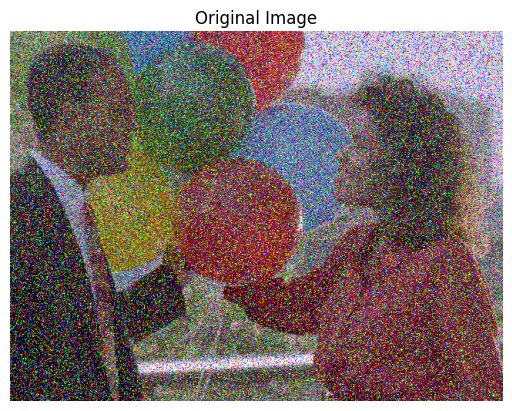

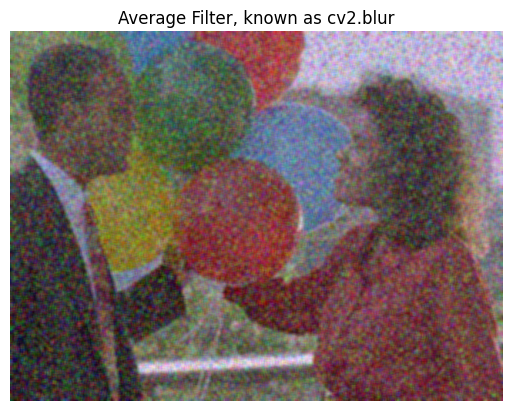

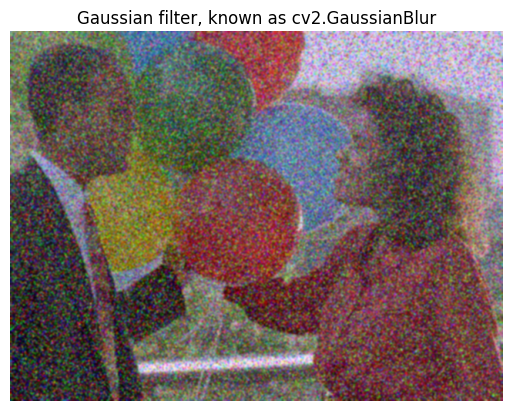

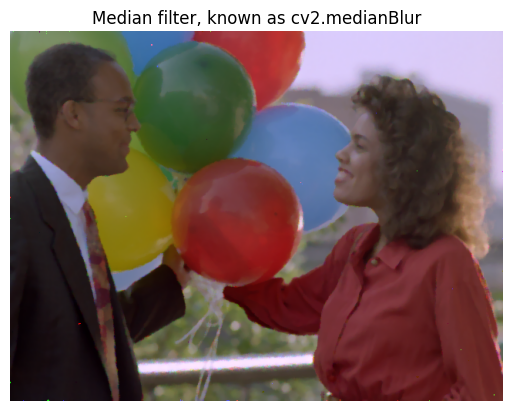

In [ ]:
# Load the image
img = cv2.imread("Fig1_balloons_noisy.png")

# Apply the average filter
average_filter = cv2.blur(img, (5, 5))

# Apply the Gaussian filter
gaussian_filter = cv2.GaussianBlur(img, (5, 5), 0)  # The sigma value is 0 in this case

# Apply the median filter
median_filter = cv2.medianBlur(img, 5)

# Display the original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')  # Hide axes
plt.show()

# Display the image with the average filter
plt.imshow(cv2.cvtColor(average_filter, cv2.COLOR_BGR2RGB))
plt.title("Average Filter, known as cv2.blur")
plt.axis('off')
plt.show()

# Display the image with the Gaussian filter
plt.imshow(cv2.cvtColor(gaussian_filter, cv2.COLOR_BGR2RGB))
plt.title("Gaussian filter, known as cv2.GaussianBlur")
plt.axis('off')
plt.show()

# Display the image with the median filter
plt.imshow(cv2.cvtColor(median_filter, cv2.COLOR_BGR2RGB))
plt.title("Median filter, known as cv2.medianBlur")
plt.axis('off')
plt.show()


## **Exercise 2.**

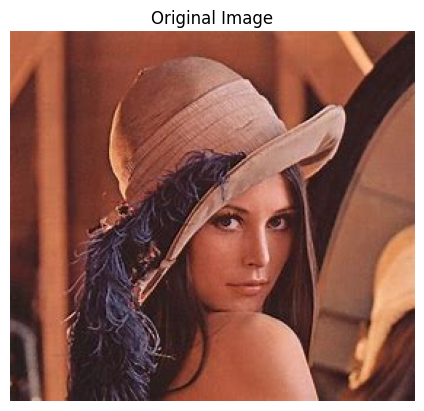

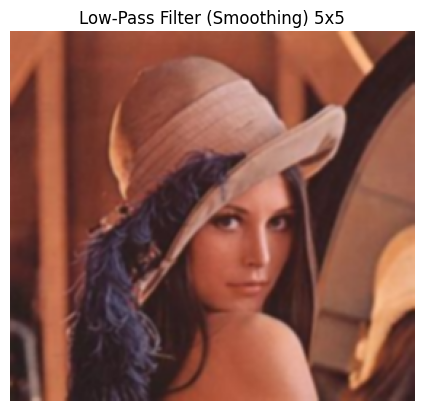

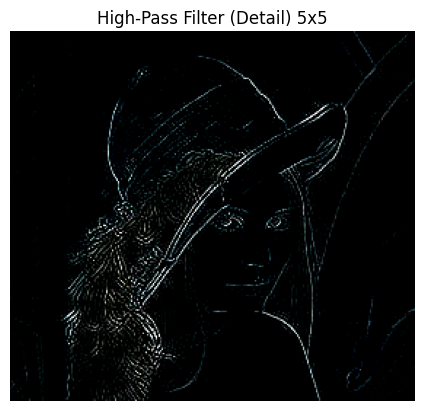

In [ ]:
# Load the image
img = cv2.imread("Fig2_lena.jpg")

# Low-Pass Filter (Smoothing) 5x5
filtro_pasa_bajas = np.array([[1, 4, 6, 4, 1],
                              [4, 16, 24, 16, 4],
                              [6, 24, 36, 24, 6],
                              [4, 16, 24, 16, 4],
                              [1, 4, 6, 4, 1]]) / 256  # Normalized

# High-Pass Filter (Detail) 5x5
filtro_pasa_altas = np.array([[-1, -4, 8, -4, -1],
                              [-4, 14, 0, 14, -4],
                              [8, 0, -58, 0, 8],
                              [-4, 14, 0, 14, -4],
                              [-1, -4, 8, -4, -1]]) / 14  # Normalized

# Apply Low-Pass Filter (Smoothing)
img_suavizada = cv2.filter2D(img, -1, filtro_pasa_bajas)

# Apply High-Pass Filter (Detail)
img_resaltada = cv2.filter2D(img, -1, filtro_pasa_altas)

# Show the resulting images
#plt.figure(figsize=(10, 5))
#plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

#plt.subplot(132)
plt.imshow(cv2.cvtColor(img_suavizada, cv2.COLOR_BGR2RGB))
plt.title("Low-Pass Filter (Smoothing) 5x5")
plt.axis('off')
plt.show()

#plt.subplot(133)
plt.imshow(cv2.cvtColor(img_resaltada, cv2.COLOR_BGR2RGB))
plt.title("High-Pass Filter (Detail) 5x5")
plt.axis('off')
plt.show()



## **Exercise 3.**

In [ ]:
# Load the image
img = cv2.imread("Fig1_ojo_original.jpg")

# Check if the image was loaded correctly
if img is not None:
    # Function to apply a sharpening filter to the image
    def aplicar_filtro_nitidez(imagen, factor):
        # Use a different sharpening mask
        mascara_enfoque = np.array([[0, -1, 0],
                                    [-1, 5, -1],
                                    [0, -1, 0]])

        imagen_nitida = cv2.filter2D(imagen, -1, mascara_enfoque * factor)
        return imagen_nitida

    # Apply the sharpening filter
    imagen_nitida = aplicar_filtro_nitidez(img, 2.0)  # Increase the factor
    imagen_muy_nitida = aplicar_filtro_nitidez(img, 4.0)  # Increase the factor even more

    # Display the images
    plt.figure(figsize=(12, 5))
    plt.subplot(131)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(cv2.cvtColor(imagen_nitida, cv2.COLOR_BGR2RGB))
    plt.title("Sharpened Image (Factor 2.0)")
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(cv2.cvtColor(imagen_muy_nitida, cv2.COLOR_BGR2RGB))
    plt.title("Very Sharpened Image (Factor 4.0)")
    plt.axis('off')

    plt.show()
else:
    print("Could not load the image. Check the file location and name.")



#**We want to see your creation!**

##Share the results of your exercise by uploading your image at the following link. We would love to see how you combined content and style in your own unique way.

##👉 [Upload your image here](https://docs.google.com/forms/d/e/1FAIpQLScueo3XCMjvyx_8V2Mzy8kHXZ-geiJYSEYg-T00uAArpmvimQ/viewform?usp=header)

**Remember: each result is unique, and we can all learn from seeing each other's work. Go ahead and share it!**